In [3]:
import os

import psycopg
import pandas as pd
import mlflow
from catboost import CatBoostClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

TABLE_NAME = 'users_churn'
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

# напишите код, который подключает tracking и registry uri
mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}") # tracking uri
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}") # registry uri

EXPERIMENT_NAME = 'churn_volkovandrey_test'
RUN_NAME = "feature_selection"
REGISTRY_MODEL_NAME = 'new_model2'
FS_ASSETS = "fs_assets" 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
# from dotenv import load_dotenv

# import psycopg2
# load_dotenv()

# Read a CSV file into a DataFrame
# X = pd.read_csv('data/initial_data.csv')
# X = df.iloc[:, :-1]  
# y = df.iloc[:, -1]   
# X = X.drop(columns=['begin_date','end_date'])
X = pd.read_csv('data/X_autofeat.csv')
y = pd.read_csv('data/y_autofeat.csv')
# # Подключение к базе данных PostgreSQL
# engine = psycopg2.connect(
#     dbname=os.getenv('DB_DESTINATION_NAME'),
#     user=os.getenv('DB_DESTINATION_USER'),
#     password=os.getenv('DB_DESTINATION_PASSWORD'),
#     host=os.getenv('DB_DESTINATION_HOST')
# )

# # Загрузка данных для задачи оттока из таблицы в базе данных PostgreSQL
# df = pd.read_sql_query('SELECT * FROM users_churn', engine)



# Разделение данных на обучающую, валидационную и тестовую выборки (если не разделены)
x, x_test, y, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)


In [3]:
X

,monthly_charges,total_charges,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,internet_service_DSL,internet_service_Fiber optic,...,gender_Female,gender_Male,senior_citizen_0,senior_citizen_1,partner_No,partner_Yes,dependents_No,dependents_Yes,multiple_lines_No,multiple_lines_Yes
0,0.738308,0.740994,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.854726,0.885201,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.990547,1.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.893532,0.866992,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.899005,0.885310,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.256716,0.002914,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7028,0.009950,0.000052,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7029,0.271642,0.003087,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7030,0.264179,0.003000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [4]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

estimator = RandomForestClassifier(n_estimators=300)

sfs = SFS(estimator, k_features=10, forward=True, floating=False, scoring='roc_auc', cv=4, n_jobs=-1)
sbs = SFS(estimator, k_features=10, forward=False, floating=False, scoring='roc_auc', cv=4, n_jobs=-1)


sfs = sfs.fit(x_train, y_train.values.ravel())
sbs = sbs.fit(x_train, y_train.values.ravel())

top_sfs = sfs.k_feature_names_
top_sbs = sbs.k_feature_names_

print('\nSequential Forward Selection (k=10)')
print('CV Score:')
print(sfs.k_score_)

print('\nSequential Backward Selection')
print('CV Score:')
print(sbs.k_score_)

/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73


Sequential Forward Selection (k=10)
CV Score:
0.7922035670281855

Sequential Backward Selection
CV Score:
0.8125514599583794


In [5]:
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sbs_df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T

In [6]:
sbs_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
39,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7869104579630894, 0.8050528795002135, 0.808...",0.80335,"(monthly_charges, total_charges, paperless_bil...",0.015808,0.009861,0.005693
38,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7916791979949875, 0.8059895241299663, 0.812...",0.806714,"(monthly_charges, total_charges, paperless_bil...",0.01525,0.009513,0.005493
37,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.7921690590111643, 0.8072126183309538, 0.815...",0.80804,"(monthly_charges, total_charges, paperless_bil...",0.015898,0.009918,0.005726
36,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.7931556163135112, 0.8069648167177426, 0.813...",0.808299,"(monthly_charges, total_charges, paperless_bil...",0.015833,0.009877,0.005703
35,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.7884483937115515, 0.806835232387898, 0.8124...",0.807247,"(monthly_charges, total_charges, paperless_bil...",0.019242,0.012004,0.006931
34,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.7911893369788107, 0.8078196186128568, 0.813...",0.807986,"(monthly_charges, total_charges, paperless_bil...",0.016916,0.010553,0.006093
33,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.788924584187742, 0.8089290423490684, 0.8154...",0.808744,"(monthly_charges, total_charges, paperless_bil...",0.01971,0.012296,0.007099
32,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.7886192754613807, 0.8097565633326361, 0.816...",0.809229,"(monthly_charges, total_charges, paperless_bil...",0.020266,0.012643,0.007299
31,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.7936864889496469, 0.8086130384569915, 0.816...",0.810154,"(monthly_charges, total_charges, paperless_bil...",0.017019,0.010617,0.00613
30,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.7941011619958988, 0.8105227022652249, 0.815...",0.811253,"(monthly_charges, total_charges, paperless_bil...",0.017868,0.011147,0.006436


In [7]:
sfs_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.6967532467532468, 0.6959428737712223, 0.697...",0.697559,"(online_security_No,)",0.002817,0.001757,0.001015
2,"(6, 11)","[0.7429277739804055, 0.7344180526885338, 0.757...",0.74851,"(payment_method_Electronic check, online_secur...",0.016503,0.010295,0.005944
3,"(6, 11, 20)","[0.7704237867395762, 0.7614511626215138, 0.781...",0.772637,"(payment_method_Electronic check, online_secur...",0.012222,0.007624,0.004402
4,"(6, 8, 11, 20)","[0.7773205741626794, 0.7719543135667972, 0.793...",0.783713,"(payment_method_Electronic check, internet_ser...",0.014911,0.009302,0.00537
5,"(6, 8, 11, 20, 33)","[0.7815037593984961, 0.7795679612974803, 0.804...",0.790016,"(payment_method_Electronic check, internet_ser...",0.016183,0.010096,0.005829
6,"(6, 8, 11, 20, 22, 33)","[0.7833264980633402, 0.7786631443978649, 0.805...",0.791586,"(payment_method_Electronic check, internet_ser...",0.017655,0.011014,0.006359
7,"(6, 8, 11, 19, 20, 22, 33)","[0.7836864889496469, 0.7793224330935645, 0.805...",0.791688,"(payment_method_Electronic check, internet_ser...",0.017085,0.010658,0.006154
8,"(6, 8, 11, 13, 19, 20, 22, 33)","[0.7840191387559808, 0.7779265597861176, 0.805...",0.791724,"(payment_method_Electronic check, internet_ser...",0.017964,0.011207,0.00647
9,"(6, 8, 11, 13, 19, 20, 22, 28, 33)","[0.7827158806106175, 0.7798862385988524, 0.806...",0.791952,"(payment_method_Electronic check, internet_ser...",0.017602,0.010981,0.00634
10,"(6, 8, 11, 12, 13, 19, 20, 22, 28, 33)","[0.7836864889496469, 0.7801954222630426, 0.805...",0.792204,"(payment_method_Electronic check, internet_ser...",0.016952,0.010575,0.006106


In [10]:
os.mkdir(FS_ASSETS)

sfs_df.to_csv(f"{FS_ASSETS}/sfs.csv")
sbs_df.to_csv(f"{FS_ASSETS}/sbs.csv")

In [ ]:
sfs.read_csv(FS_ASSETS + "/sfs.csv")
sbs.read_csv(FS_ASSETS + "/sbs.csv")

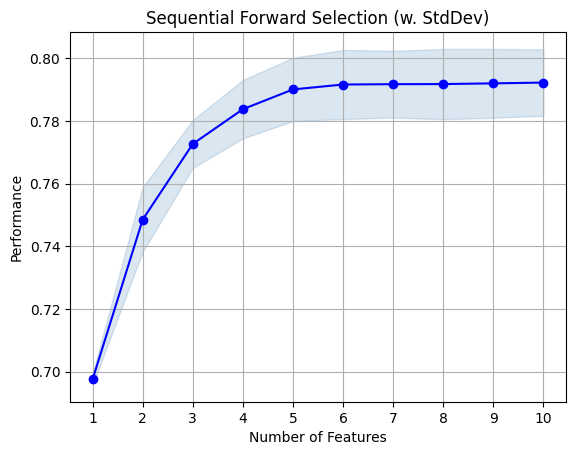

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

plt.savefig("fs_assets/sfs.png")

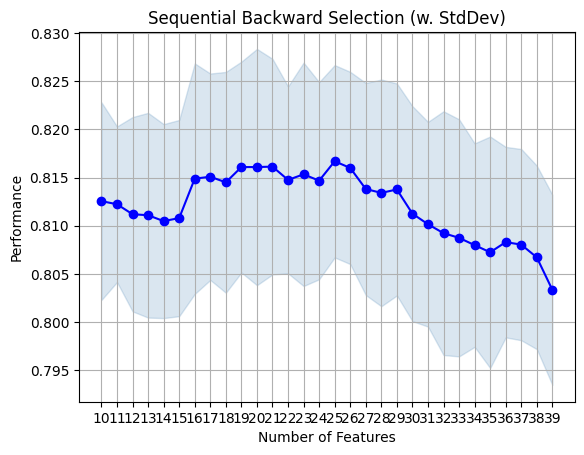

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

plt.savefig("fs_assets/sbs.png")

In [16]:
# Преобразуем списки в множества
set_sfs = set(top_sfs)
set_sbs = set(top_sbs)

# # Находим пересечение и объединение
# interc_features = set_sfs.intersection(set_sbs)  # Признаки, отобранные обоими методами
# union_features = set_sfs.union(set_sbs)          # Признаки, отобранные хотя бы одним методом

# # Преобразуем множества обратно в списки, если это необходимо
# interc_features_list = list(interc_features)
# union_features_list = list(union_features)

interc_features = list(set(top_sbs) & set(top_sfs))
union_features = list(set(top_sbs) | set(top_sfs))

# Вывод результатов
print('Пересекающиеся признаки:', interc_features_list)
print('Объединяющиеся признаки:', union_features_list)



Пересекающиеся признаки: ['online_security_Yes']
Объединяющиеся признаки: ['online_security_nan', 'paperless_billing_No', 'online_security_Yes', 'total_charges', 'tech_support_nan', 'device_protection_nan', 'dependents_Yes', 'tech_support_Yes', 'streaming_tv_Yes', 'tech_support_No', 'internet_service_nan', 'internet_service_DSL', 'streaming_movies_nan', 'monthly_charges', 'payment_method_Credit card (automatic)', 'payment_method_Electronic check', 'online_security_No', 'senior_citizen_0', 'partner_No']


In [3]:
EXPERIMENT_NAME

'churn_volkovandrey_test'

In [2]:
mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

AttributeError: 'NoneType' object has no attribute 'experiment_id'

In [8]:
!echo $S3_BUCKET_NAME

In [15]:
from dotenv import load_dotenv
load_dotenv()

EXPERIMENT_NAME = "churn_volkovandrey_test2"
# RUN_NAME = "data_check2"

experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if experiment is None:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id

os.environ['MLFLOW_S3_ENDPOINT_URL'] = 'https://storage.yandexcloud.net'
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ['AWS_SECRET_ACCESS_KEY'] = os.getenv('AWS_SECRET_ACCESS_KEY')

with mlflow.start_run(run_name=f"{RUN_NAME}_intersection_and_union", experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    # mlflow.log_artifacts(FS_ASSETS)
    mlflow.log_artifact('fs_assets/sbs.csv', 'fs_assets')
    mlflow.log_artifact('fs_assets/sbc.png', 'fs_assets')
    mlflow.log_artifact('fs_assets/sfs.csv', 'fs_assets')
    mlflow.log_artifact('fs_assets/sfc.png', 'fs_assets')

S3UploadFailedError: Failed to upload fs_assets/sbs.csv to s3-student-mle-20240824-ff21c1bdfa/9/12af78e5e1394fe3bb624ee531fc38e7/artifacts/fs_assets/sbs.csv: An error occurred (SignatureDoesNotMatch) when calling the PutObject operation: The request signature we calculated does not match the signature you provided. Check your key and signing method.

In [ ]:
# задаём название эксперимента и имя запуска для логирования в MLflow

# EXPERIMENT_NAME = "churn_volkovandrey2w"
EXPERIMENT_NAME = "churn_volkovandrey_test"
RUN_NAME = "feature_selection_intersection_and_union"

# создаём новый эксперимент в MLflow с указанным названием 
# если эксперимент с таким именем уже существует, 
# MLflow возвращает идентификатор существующего эксперимента
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if experiment is None:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id
    
    print(run_id)
    print(experiment_id)
    print(mlflow.get_artifact_uri())
    # логируем файлы как артефакты эксперимента — 'columns.txt' и 'users_churn.csv'
    mlflow.log_artifact('fs_assets/sbs.csv', 'fs_assets')
    mlflow.log_artifact('fs_assets/sbs.png', 'fs_assets')
    mlflow.log_artifact('fs_assets/sfs.csv', 'fs_assets')
    mlflow.log_artifact('fs_assets/sfs.png', 'fs_assets')


experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
# получаем данные о запуске эксперимента по его уникальному идентификатору
run = mlflow.get_run(run_id)



# проверяем, что статус запуска эксперимента изменён на 'FINISHED'
# это утверждение (assert) можно использовать для автоматической проверки того, 
# что эксперимент был завершён успешно
assert run.info.status == 'FINISHED'

